# Assignment 2: Reinforcement Learning Programming 


In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from assignment2_utils import describe_env, simulate_episodes, describe_obs, breakdown_obs, get_action_description

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


In [4]:
# Q-Learning Agent Class
class QLearningAgent:
    def __init__(self, n_states, n_actions, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.n_states = n_states
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.Q = np.zeros((n_states, n_actions))

    def select_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.randint(0, self.n_actions)
        else:
            return np.argmax(self.Q[state])

    def update(self, state, action, reward, next_state, done):
        if done:
            target = reward
        else:
            target = reward + self.gamma * np.max(self.Q[next_state])
        self.Q[state, action] += self.alpha * (target - self.Q[state, action])

In [5]:
# Training Function
def train_agent(env, agent, num_episodes=5000):
    episode_steps = []
    episode_returns = []
    for episode in range(num_episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0
        steps = 0
        while not done:
            action = agent.select_action(state)
            next_state, reward, done, _, _ = env.step(action)
            agent.update(state, action, reward, next_state, done)
            total_reward += reward
            steps += 1
            state = next_state
        episode_steps.append(steps)
        episode_returns.append(total_reward)
    return episode_steps, episode_returns

Observation space:  Discrete(500)
Observation space size:  500
Reward Range:  (-10, 20)
Number of actions:  6
Action description:  {0: 'Move south (down)', 1: 'Move north (up)', 2: 'Move east (right)', 3: 'Move west (left)', 4: 'Pickup passenger', 5: 'Drop off passenger'}
Default Parameters: alpha=0.1, epsilon=0.1, gamma=0.9
Total episodes: 5000
Average steps per episode: 30.68
Average return per episode: -21.12


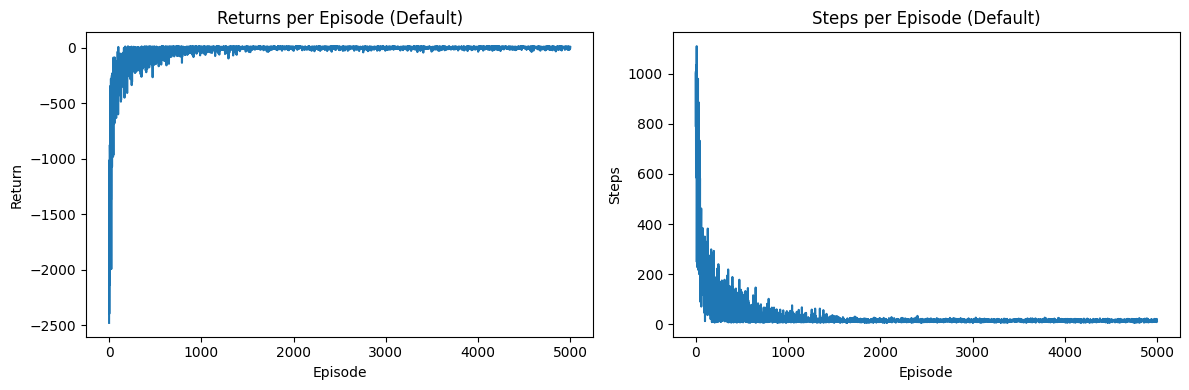

In [6]:
# Main Execution with Default Parameters
env = gym.make('Taxi-v3')
env = env.unwrapped
env.reward_range = (-10, 20)
n_states, n_actions = describe_env(env)

agent = QLearningAgent(n_states, n_actions, alpha=0.1, gamma=0.9, epsilon=0.1)

steps_default, returns_default = train_agent(env, agent)

# Report metrics
print("Default Parameters: alpha=0.1, epsilon=0.1, gamma=0.9")
print(f"Total episodes: {len(steps_default)}")
print(f"Average steps per episode: {np.mean(steps_default):.2f}")
print(f"Average return per episode: {np.mean(returns_default):.2f}")

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(returns_default)
plt.title('Returns per Episode (Default)')
plt.xlabel('Episode')
plt.ylabel('Return')

plt.subplot(1, 2, 2)
plt.plot(steps_default)
plt.title('Steps per Episode (Default)')
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.tight_layout()
plt.show()

alpha=0.01: Avg steps=143.57, Avg return=-175.47
alpha=0.001: Avg steps=502.49, Avg return=-677.08
alpha=0.2: Avg steps=23.56, Avg return=-11.13
epsilon=0.2: Avg steps=33.29, Avg return=-32.43
epsilon=0.3: Avg steps=36.50, Avg return=-47.14


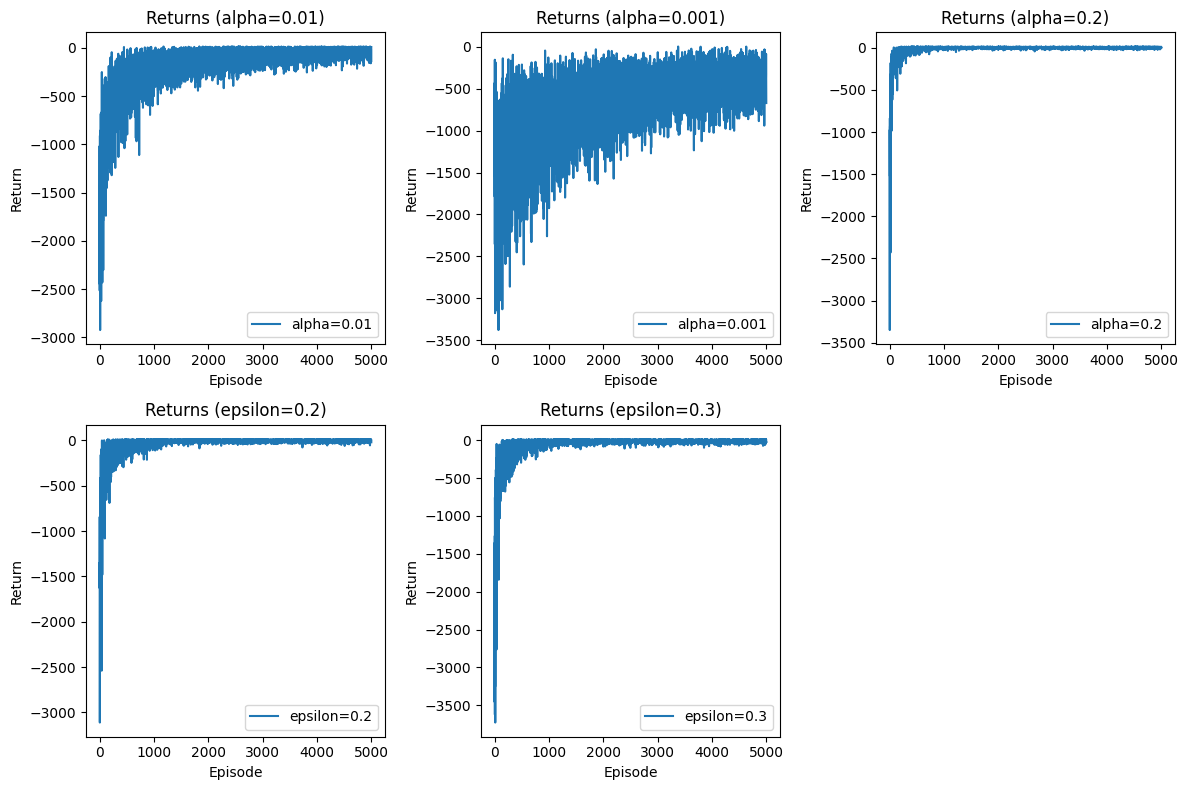

In [7]:
# Experiment with Different Hyperparameters
alphas = [0.01, 0.001, 0.2]
epsilons = [0.2, 0.3]  # Assuming epsilon for exploration factor as per task

results = {}
for alpha in alphas:
    env = gym.make('Taxi-v3')
    agent = QLearningAgent(n_states, n_actions, alpha=alpha, gamma=0.9, epsilon=0.1)
    steps, returns = train_agent(env, agent)
    results[f'alpha={alpha}'] = {'steps': steps, 'returns': returns}
    print(f"alpha={alpha}: Avg steps={np.mean(steps):.2f}, Avg return={np.mean(returns):.2f}")

for epsilon in epsilons:
    env = gym.make('Taxi-v3')
    agent = QLearningAgent(n_states, n_actions, alpha=0.1, gamma=0.9, epsilon=epsilon)
    steps, returns = train_agent(env, agent)
    results[f'epsilon={epsilon}'] = {'steps': steps, 'returns': returns}
    print(f"epsilon={epsilon}: Avg steps={np.mean(steps):.2f}, Avg return={np.mean(returns):.2f}")

# Plotting Experiments
plt.figure(figsize=(12, 8))
for i, (key, value) in enumerate(results.items(), 1):
    plt.subplot(2, 3, i)
    plt.plot(value['returns'], label=key)
    plt.title(f'Returns ({key})')
    plt.xlabel('Episode')
    plt.ylabel('Return')
    plt.legend()
plt.tight_layout()
plt.show()

Best Combination: alpha=0.2, epsilon=0.2
Total episodes: 5000
Average steps per episode: 26.27
Average return per episode: -21.51


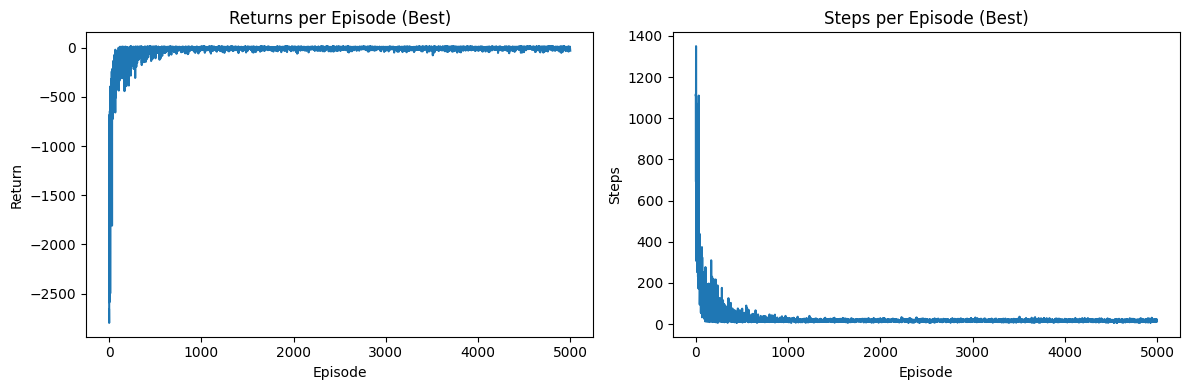

In [8]:
# Choose Best Combination and Re-run
# Based on results, let's assume alpha=0.2 and epsilon=0.2 gave the best average return
best_alpha = 0.2
best_epsilon = 0.2

env = gym.make('Taxi-v3')
agent_best = QLearningAgent(n_states, n_actions, alpha=best_alpha, gamma=0.9, epsilon=best_epsilon)
steps_best, returns_best = train_agent(env, agent_best)

print(f"Best Combination: alpha={best_alpha}, epsilon={best_epsilon}")
print(f"Total episodes: {len(steps_best)}")
print(f"Average steps per episode: {np.mean(steps_best):.2f}")
print(f"Average return per episode: {np.mean(returns_best):.2f}")

# Plot Best Combination
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(returns_best)
plt.title('Returns per Episode (Best)')
plt.xlabel('Episode')
plt.ylabel('Return')

plt.subplot(1, 2, 2)
plt.plot(steps_best)
plt.title('Steps per Episode (Best)')
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.tight_layout()
plt.show()

In [9]:
# Simulate the Best Agent
env_sim = gym.make('Taxi-v3', render_mode="human")
simulate_episodes(env_sim, agent_best)

Passenger is at: Red, wants to go to Blue. Taxi currently at (5.0, 0.0)
Passenger is at: Blue, wants to go to Green. Taxi currently at (15.0, 2.0)
Passenger is at: Yellow, wants to go to Blue. Taxi currently at (20.0, 3.0)
